<a href="https://colab.research.google.com/github/chielgroen1998/MLOps/blob/main/datacollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install alpha_vantage
!pip install xgboost
!pip install pandas_ta==0.3.14b0
!pip install optuna
!pip install --upgrade pyspark==3.3.0 delta-spark==2.2.0
!pip install --upgrade numpy
!pip install --upgrade pandas_ta


In [2]:
import pandas as pd
import numpy as np
np.NaN = np.nan
import pandas_ta as ta
import optuna
import logging
from datetime import timedelta
from alpha_vantage.timeseries import TimeSeries

add more data visualizations and insights

after engineering move to pyspark, describe in report why

transforming (remove nulls after cuz its about loading the data in first)

removing rows or mean imputation without a rolling window is not smart because of the timeseries nature of stocks, it would ruin indications of growing or shrinking trends in price


In [3]:
import matplotlib.pyplot as plt

Data for LIT:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-20    37.97  38.3600   37.84     38.23   127249.0
2025-05-19    37.89  38.2600   37.89     38.20   220562.0
2025-05-16    38.48  38.6000   38.30     38.58   143462.0
2025-05-15    38.82  38.9662   38.47     38.74   128908.0
2025-05-14    39.29  39.5500   39.16     39.24   120114.0


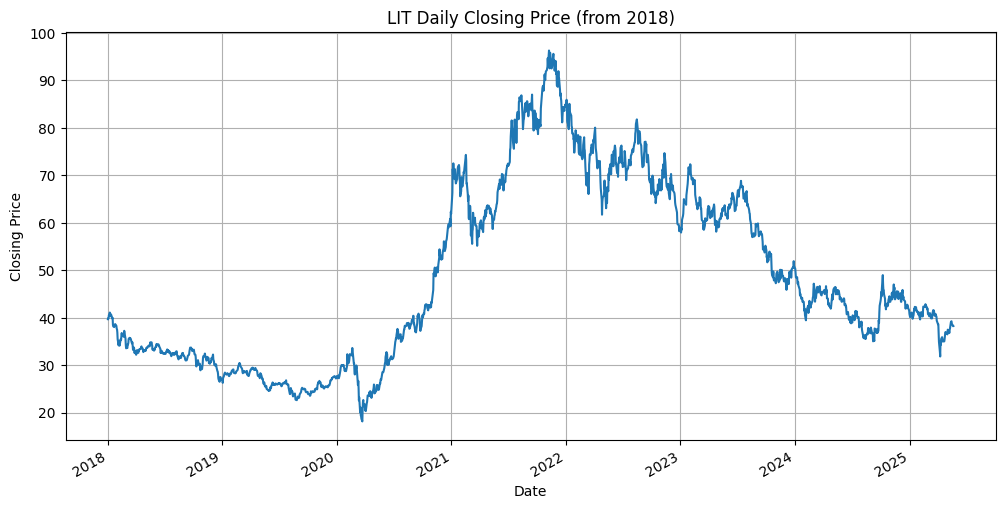

Data for REMX:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-20    38.01  38.2354  37.9500     38.11    31346.0
2025-05-19    38.28  38.2800  37.8200     38.15   114099.0
2025-05-16    39.41  39.4100  38.9400     39.31   103116.0
2025-05-15    39.65  39.8600  39.1900     39.67   141722.0
2025-05-14    40.08  40.2900  39.6337     39.77   126862.0


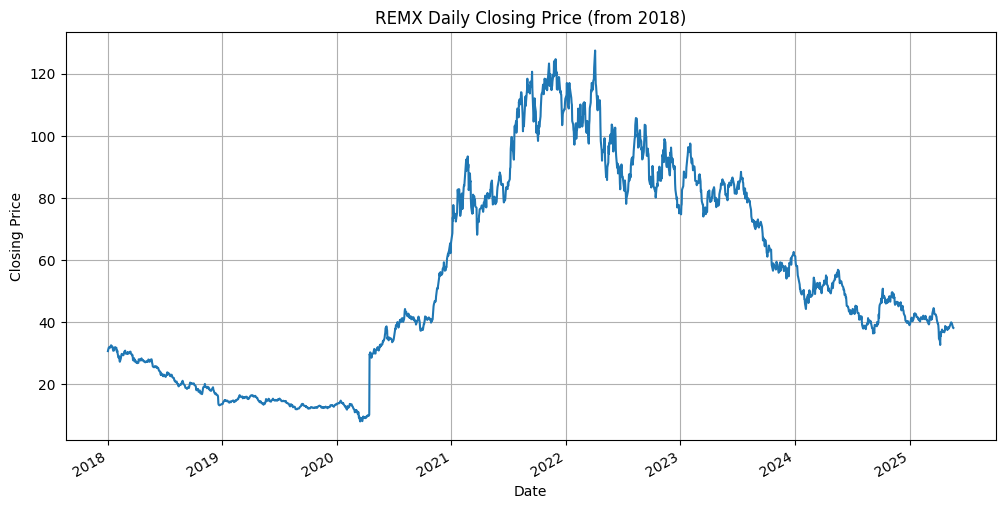

Data for URA:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-20    28.00   28.180  27.7100     28.01  2324410.0
2025-05-19    27.28   27.890  27.2601     27.81  2081668.0
2025-05-16    28.05   28.160  27.5701     27.71  2220237.0
2025-05-15    27.92   28.090  27.5701     28.01  2131299.0
2025-05-14    27.96   28.305  27.8600     28.15  2212220.0


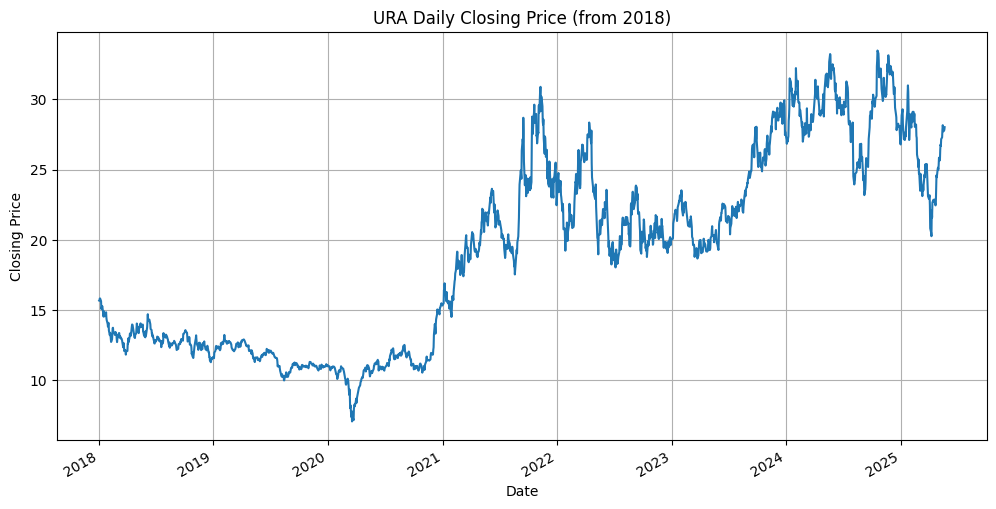

Data for GDX:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-20   47.430   48.815  47.260     48.81  26942345.0
2025-05-19   47.100   47.400  46.650     47.34  19577587.0
2025-05-16   45.410   46.350  45.245     46.33  17271971.0
2025-05-15   46.050   46.600  45.605     46.49  23456736.0
2025-05-14   45.505   45.660  45.100     45.55  26797018.0


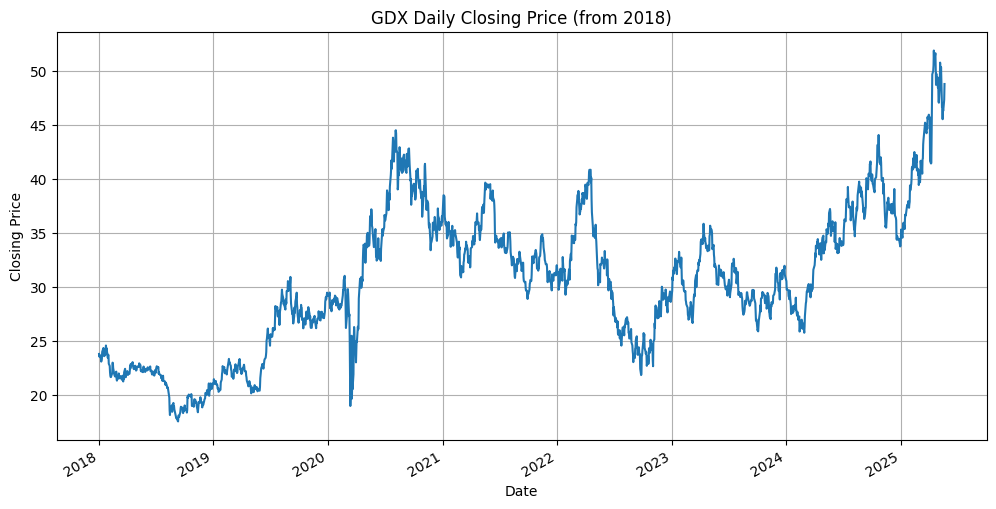

Data for GDXJ:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-20   60.250    62.37  60.095     62.27  7655832.0
2025-05-19   59.640    60.27  59.260     60.24  5147251.0
2025-05-16   57.630    58.71  57.460     58.71  5202932.0
2025-05-15   58.600    59.24  57.840     59.21  5814525.0
2025-05-14   57.975    58.26  57.400     57.88  7900770.0


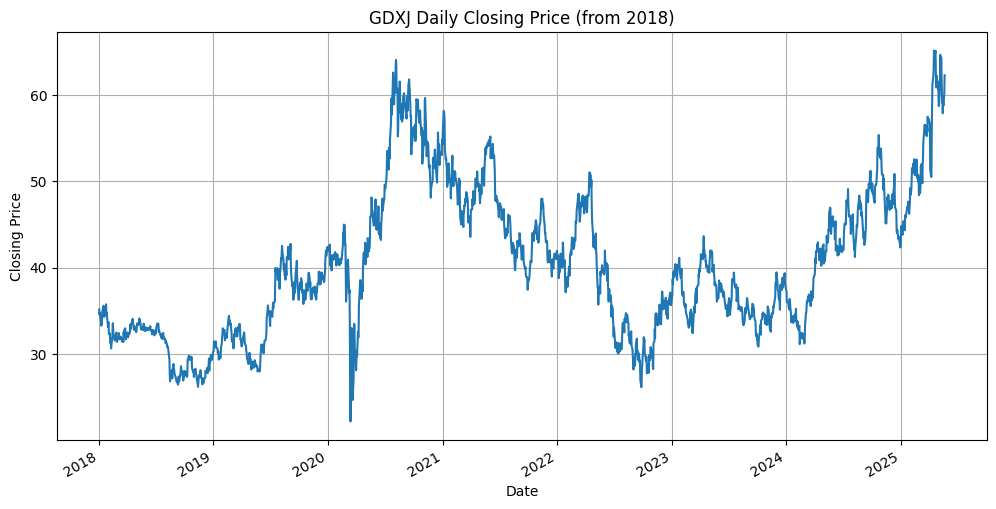

Data for XLE:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-20   84.310    84.50  83.510     83.59  11391071.0
2025-05-19   84.770    84.86  83.745     84.37  12393533.0
2025-05-16   85.800    85.85  84.605     85.48  10862912.0
2025-05-15   84.170    85.66  83.960     85.61  14860766.0
2025-05-14   85.195    85.58  84.920     85.25  10666327.0


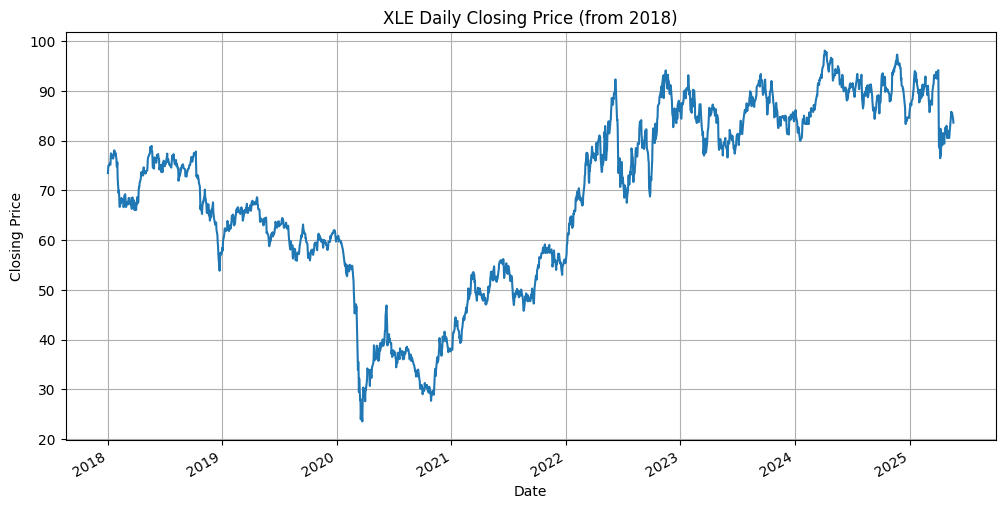

Data for ICLN:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-20    12.94    13.06  12.9400     12.99  1473970.0
2025-05-19    12.82    12.87  12.7250     12.83  1908367.0
2025-05-16    13.05    13.05  12.8799     12.96  1719319.0
2025-05-15    12.89    13.08  12.8500     13.00  2736296.0
2025-05-14    12.85    12.96  12.8300     12.93  3522216.0


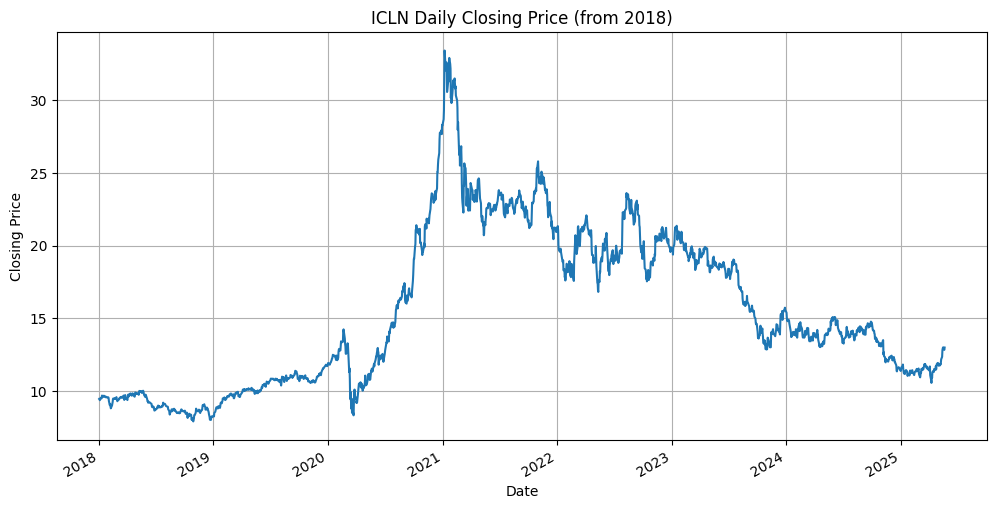

Data for SPY:
            1. open  2. high    3. low  4. close   5. volume
date                                                        
2025-05-20   593.09   594.05  589.6000    592.85  60614492.0
2025-05-19   588.10   595.54  588.1000    594.85  68168509.0
2025-05-16   591.25   594.50  589.2800    594.20  76052101.0
2025-05-15   585.56   590.97  585.0969    590.46  71268145.0
2025-05-14   587.81   588.98  585.5350    587.59  66283531.0


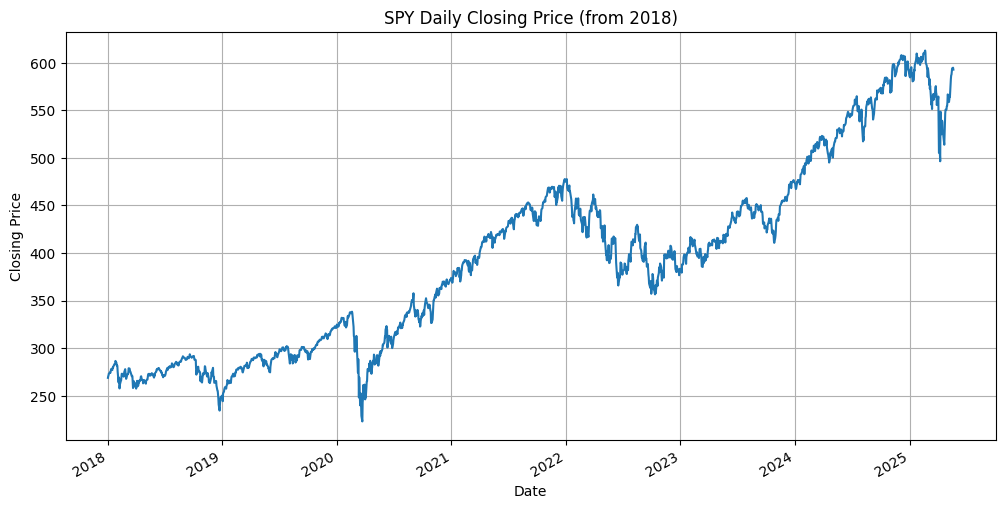

Data for GLD:
            1. open   2. high   3. low  4. close   5. volume
date                                                        
2025-05-20  298.350  303.6825  298.300    303.58  12850980.0
2025-05-19  297.845  298.5800  296.482    298.03  11656261.0
2025-05-16  292.620  294.5750  291.780    294.24  14173039.0
2025-05-15  294.100  297.9000  293.750    297.84  13497735.0
2025-05-14  293.670  294.8000  291.960    293.16  14800596.0


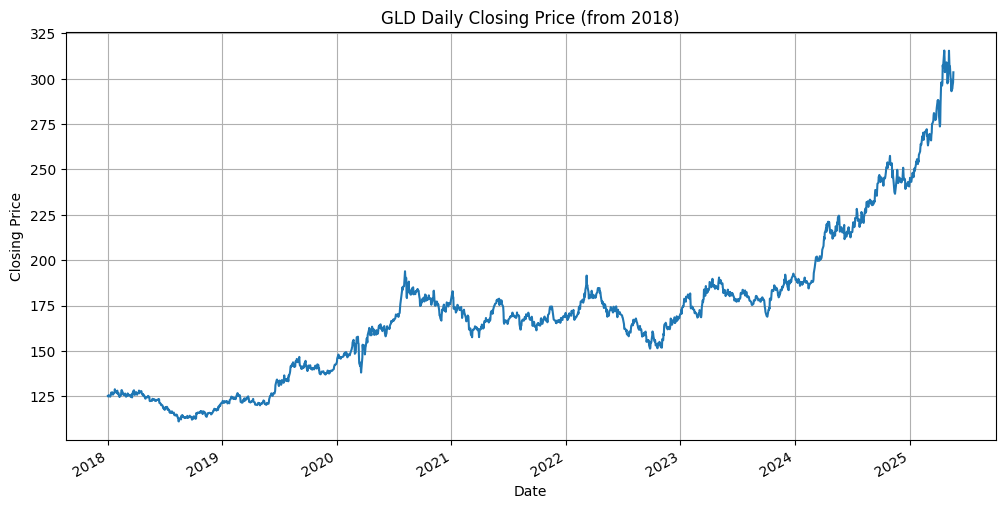

Data for CPER:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-20    28.80  29.2500  28.8000     29.24   225676.0
2025-05-19    28.86  29.1992  28.8600     29.09   170475.0
2025-05-16    28.83  28.9100  28.5400     28.61   135681.0
2025-05-15    28.90  29.3250  28.7994     29.27    95659.0
2025-05-14    29.26  29.2600  28.9100     29.00   160079.0


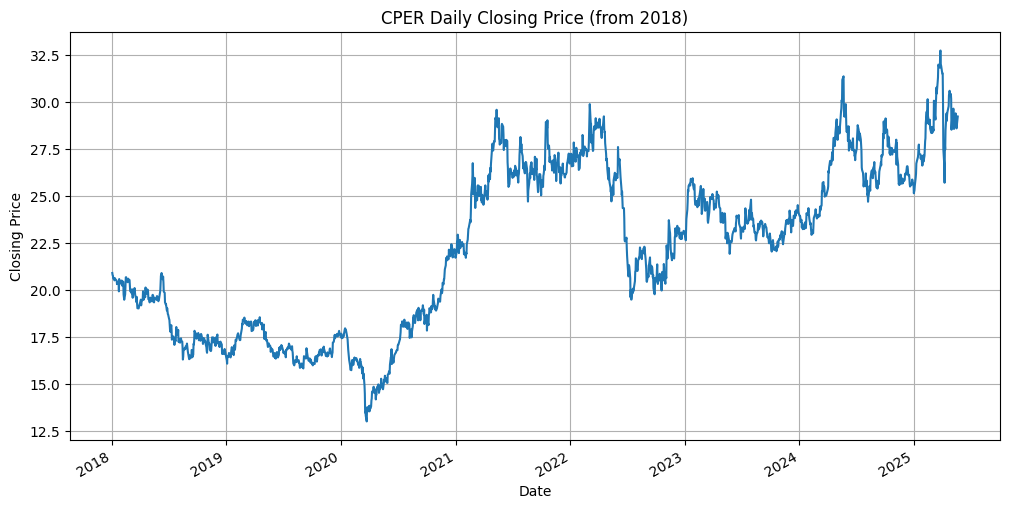

Data for USO:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-20    68.37    68.80   67.78     68.66  2786093.0
2025-05-19    68.11    69.10   67.88     68.51  5136884.0
2025-05-16    67.83    68.54   67.42     68.10  3769410.0
2025-05-15    67.41    67.79   66.87     67.59  5263445.0
2025-05-14    69.28    69.55   68.70     68.73  2802450.0


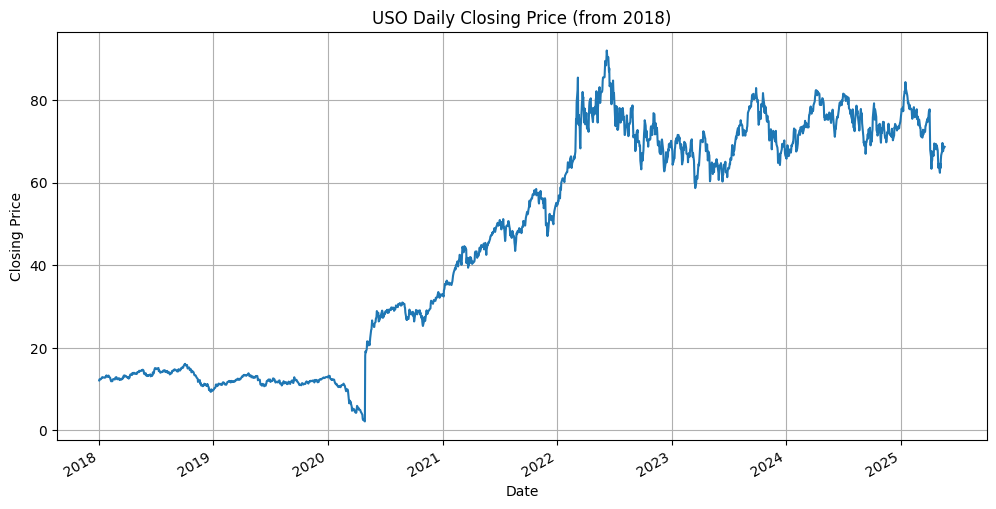

Data for UNG:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-20    16.32  17.2200  16.295     16.99  7822962.0
2025-05-19    16.02  16.0900  15.620     15.65  8609611.0
2025-05-16    17.04  17.2685  16.640     16.71  4364129.0
2025-05-15    17.39  17.5100  16.780     16.80  6212183.0
2025-05-14    17.64  17.8400  17.370     17.40  5132737.0


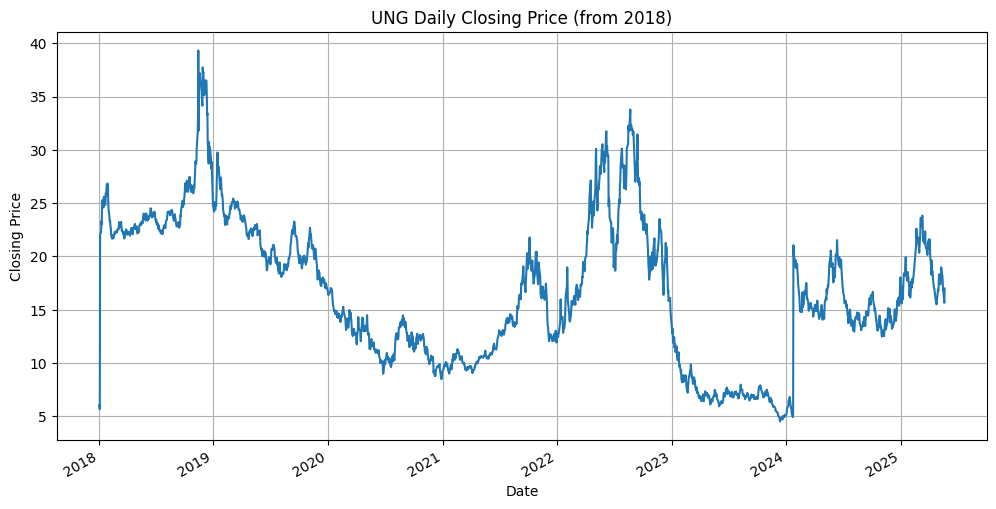

ValueError: We have detected your API key as PH8UF085L5T5MFZN and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

In [4]:

api_key = 'PH8UF085L5T5MFZN'
symbols = ['LIT', 'REMX', 'URA', 'GDX', 'GDXJ', 'XLE', 'ICLN', 'SPY', 'GLD', 'CPER', 'USO', 'UNG', 'KOL', 'JJN']

ts = TimeSeries(key=api_key, output_format='pandas')
all_data = {}
for symbol in symbols:
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    # Filter data from 2018 onwards
    data.index = pd.to_datetime(data.index)
    data = data[data.index >= '2018-01-01']
    all_data[symbol] = data
    print(f"Data for {symbol}:")
    print(data.head())  # Print the first few rows of the dataset
    # Plot the data
    data['4. close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

In [5]:
all_data['LIT'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['REMX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['URA'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GDX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GDXJ'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['XLE'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['ICLN'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['SPY'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GLD'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['CPER'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['USO'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['UNG'].columns = ['open', 'high', 'low', 'close', 'volume']
#all_data['KOL'].columns = ['open', 'high', 'low', 'close', 'volume']
#all_data['JJN'].columns = ['open', 'high', 'low', 'close', 'volume']

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for LIT:
             open     high    low  close    volume  SMA_100  EMA_20  WMA_20  \
date                                                                          
2025-05-20  37.97  38.3600  37.84  38.23  127249.0      NaN     NaN     NaN   
2025-05-19  37.89  38.2600  37.89  38.20  220562.0      NaN     NaN     NaN   
2025-05-16  38.48  38.6000  38.30  38.58  143462.0      NaN     NaN     NaN   
2025-05-15  38.82  38.9662  38.47  38.74  128908.0      NaN     NaN     NaN   
2025-05-14  39.29  39.5500  39.16  39.24  120114.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-20     NaN      NaN  ...       0        0       1          NaN   
2025-05-19     NaN      NaN  ...       0        0 

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[5.52233059e+06 4.99201386e+06 4.72248210e+06 5.36789619e+06
 2.06607260e+06 5.69968054e+06 5.12809776e+06 5.63439184e+06
 3.64218100e+06 3.46122767e+06 4.69887293e+06 1.49365575e+07
 2.04683107e+07 8.43380965e+06 3.35273084e+06 5.63177982e+06
 1.34957917e+07 8.46722347e+06 4.75673657e+06 4.98906139e+06
 1.16171077e+07 4.02446677e+06 5.95735234e+06 5.09298617e+06
 5.45136545e+06 1.66535510e+07 8.43738426e+06 7.81023300e+06
 1.37139732e+07 8.40491309e+06 1.04899567e+07 8.23135220e+06
 1.06386907e+07 1.32975360e+07 8.30539121e+06 1.37804730e+07
 6.45609172e+06 9.53145208e+06 8.45888576e+06 6.96818611e+06
 1.09229315e+07 5.41442286e+06 9.97029800e+06 9.81017535e+06
 1.42641988e+07 1.43609086e+07 1.17175136e+07 1.16350080e+07
 1.09736504e+07 1.37234025e+07 1.05402190e+07 1.06532633

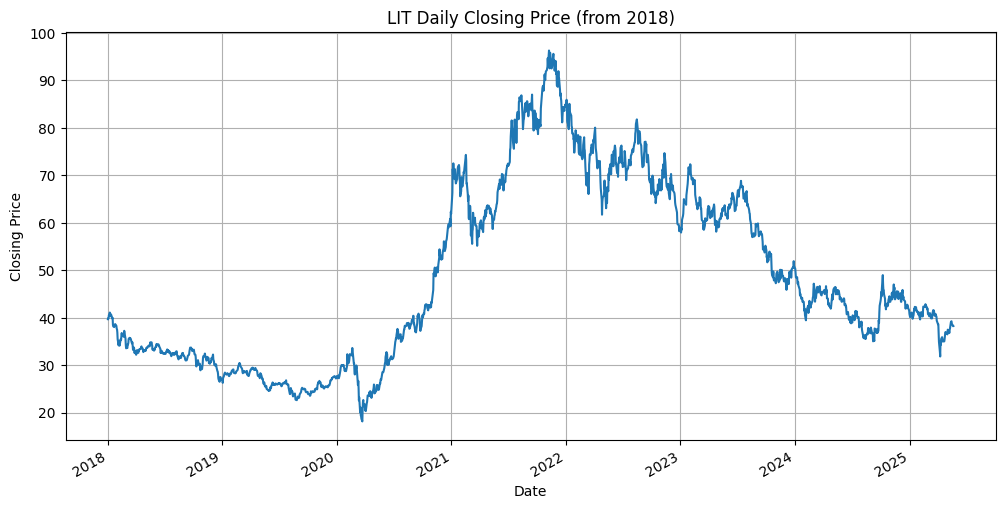

Number of technical indicators successfully added to LIT: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for REMX:
             open     high      low  close    volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-20  38.01  38.2354  37.9500  38.11   31346.0      NaN     NaN     NaN   
2025-05-19  38.28  38.2800  37.8200  38.15  114099.0      NaN     NaN     NaN   
2025-05-16  39.41  39.4100  38.9400  39.31  103116.0      NaN     NaN     NaN   
2025-05-15  39.65  39.8600  39.1900  39.67  141722.0      NaN     NaN     NaN   
2025-05-14  40.08  40.2900  39.6337  39.77  126862.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-20     NaN      NaN  ...       0        

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 4044209.52        5608411.94666667  5061527.3898      1917201.5072
  1641347.07333333  3068579.1509      2910684.46666667  3322615.7356
  4377092.58        3496569.2763      6088323.41333333  8628793.12166667
  5935856.62       12240331.04       15797628.45876666 13522127.9364
  3275212.22        8835137.61        7787145.13333333  2632856.75333333
 10748891.38396667  9835553.175       4017156.6434      4108256.01666667
  4322197.66        5832853.         17145949.33333333  4295946.2
  6595921.76        8856419.5         6541037.28666667  2325348.
 11555808.992       3821609.20166667  1990052.16        3936343.08
  8503529.68666667  3152348.32        7347492.2        21617013.
  1878163.55526667  4754713.6         2765453.01093333  2428090.28
  1734673.85        3843838.6899

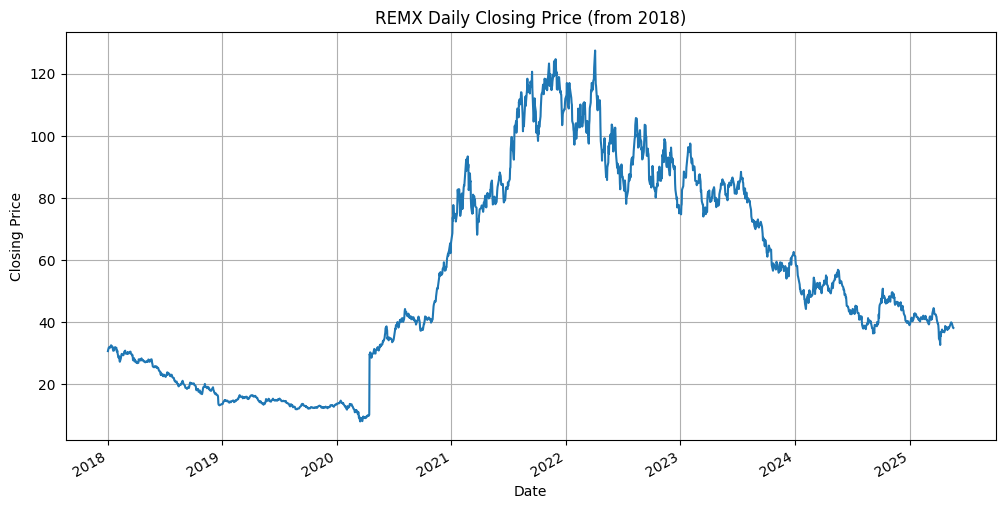

Number of technical indicators successfully added to REMX: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for URA:
             open    high      low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-20  28.00  28.180  27.7100  28.01  2324410.0      NaN     NaN     NaN   
2025-05-19  27.28  27.890  27.2601  27.81  2081668.0      NaN     NaN     NaN   
2025-05-16  28.05  28.160  27.5701  27.71  2220237.0      NaN     NaN     NaN   
2025-05-15  27.92  28.090  27.5701  28.01  2131299.0      NaN     NaN     NaN   
2025-05-14  27.96  28.305  27.8600  28.15  2212220.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-20     NaN      NaN  ...       0        

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6.17522658e+07 5.94420002e+07 6.21744431e+07 8.69899092e+07
 3.54090043e+07 5.70468816e+07 3.20806765e+07 1.25506996e+08
 7.36068599e+07 3.61460179e+07 5.34518818e+07 9.26654959e+07
 4.04665521e+07 6.39961761e+07 5.70958017e+07 6.44666131e+07
 7.14404232e+07 7.89277195e+07 1.00391271e+08 7.41856005e+07
 5.88236471e+07 9.88408820e+07 7.20795498e+07 1.92042833e+08
 7.82544412e+07 7.89689413e+07 1.16007858e+08 6.16019142e+07
 6.76003507e+07 5.05248199e+07 6.46532571e+07 4.08919199e+07
 5.60064722e+07 5.10312541e+07 5.47171096e+07 7.36063107e+07
 5.25496390e+07 1.99417680e+08 1.23536615e+08 5.79355104e+07
 4.96495787e+07 7.25033509e+07 8.38948879e+07 8.09209114e+07
 8.09117142e+07 9.38351233e+07 4.60337890e+07 4.47182114e+07
 7.18154295e+07 8.42101788e+07 8.54263260e+07 8.22187082

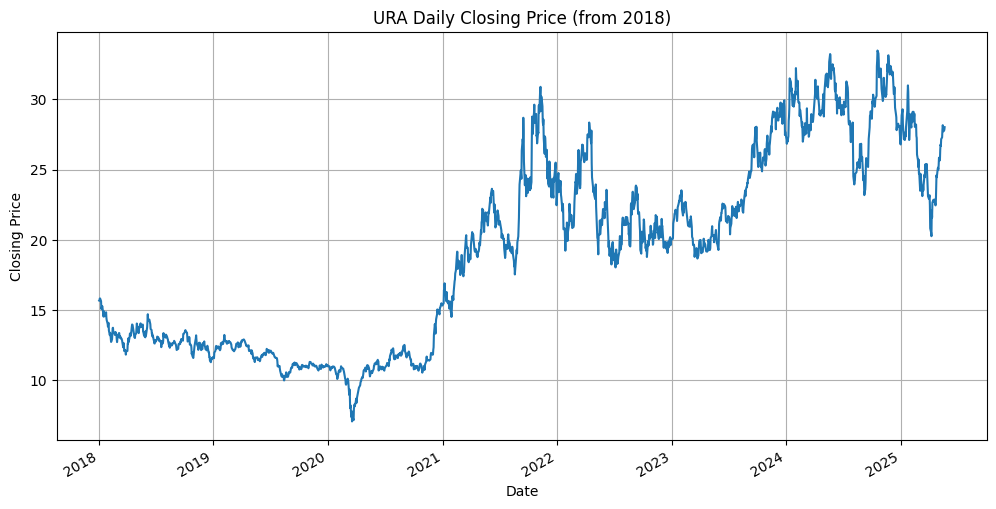

Number of technical indicators successfully added to URA: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for GDX:
              open    high     low  close      volume  SMA_100  EMA_20  \
date                                                                     
2025-05-20  47.430  48.815  47.260  48.81  26942345.0      NaN     NaN   
2025-05-19  47.100  47.400  46.650  47.34  19577587.0      NaN     NaN   
2025-05-16  45.410  46.350  45.245  46.33  17271971.0      NaN     NaN   
2025-05-15  46.050  46.600  45.605  46.49  23456736.0      NaN     NaN   
2025-05-14  45.505  45.660  45.100  45.55  26797018.0      NaN     NaN   

            WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
date                                 ...                            
2025-05-20     NaN     NaN      NaN  ...       0        0       1   
2025-05-19     NaN     NaN      NaN  ..

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.08444400e+09 1.03919641e+09 2.01043545e+09 1.03438514e+09
 1.11680533e+09 1.56797912e+09 7.70639393e+08 6.38421822e+08
 7.42142548e+08 1.12781321e+09 1.92879635e+09 1.88581074e+09
 1.90484778e+09 2.03188339e+09 2.54956456e+09 1.38420980e+09
 7.25690029e+08 7.86605336e+08 9.91281110e+08 7.29753814e+08
 4.53309975e+08 7.71140261e+08 9.81573869e+08 7.13096358e+08
 8.74219044e+08 5.22501336e+08 5.18620974e+08 1.30860300e+09
 6.88152070e+08 8.85967843e+08 1.09448423e+09 7.27929003e+08
 1.07113773e+09 1.12187702e+09 5.21436833e+08 4.72472948e+08
 4.96084190e+08 7.17815111e+08 4.80513918e+08 3.61618953e+08
 3.01349620e+08 9.68924704e+08 1.14679018e+09 5.33612114e+08
 4.17292029e+08 7.19168818e+08 8.60564316e+08 8.18879040e+08
 1.15891512e+09 3.72171477e+08 3.07371225e+08 2.73937332

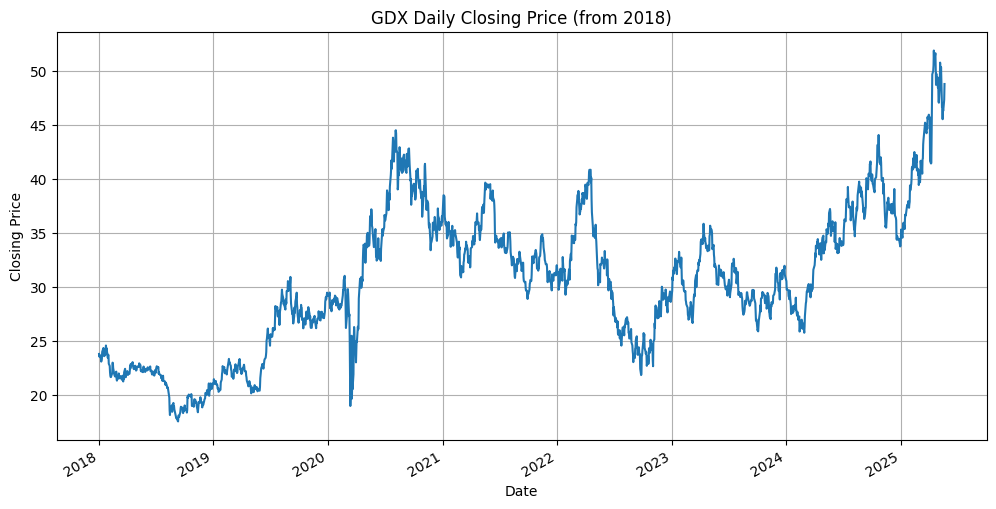

Number of technical indicators successfully added to GDX: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for GDXJ:
              open   high     low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                           
2025-05-20  60.250  62.37  60.095  62.27  7655832.0      NaN     NaN     NaN   
2025-05-19  59.640  60.27  59.260  60.24  5147251.0      NaN     NaN     NaN   
2025-05-16  57.630  58.71  57.460  58.71  5202932.0      NaN     NaN     NaN   
2025-05-15  58.600  59.24  57.840  59.21  5814525.0      NaN     NaN     NaN   
2025-05-14  57.975  58.26  57.400  57.88  7900770.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-20     NaN      NaN  ...       0        0      

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.41680871e+08 2.88503598e+08 7.32835548e+08 3.10652602e+08
 3.23732562e+08 6.00146828e+08 2.02738765e+08 1.78307388e+08
 3.00943118e+08 2.24687203e+08 5.63588857e+08 4.53156060e+08
 5.39133378e+08 7.11893754e+08 3.70200793e+08 2.30695835e+08
 1.78743389e+08 2.43272096e+08 1.67951917e+08 1.48640083e+08
 2.10990708e+08 2.69047381e+08 2.80358531e+08 2.74810160e+08
 1.47612074e+08 1.35394253e+08 3.12427836e+08 2.57723661e+08
 2.72598345e+08 3.15299872e+08 2.41944578e+08 2.87495295e+08
 2.65519573e+08 2.77258111e+08 2.30219450e+08 1.41499733e+08
 1.11089106e+08 1.97016339e+08 1.37116219e+08 2.45410744e+08
 1.31684083e+08 1.40831815e+08 2.37496436e+08 3.01420804e+08
 1.54560564e+08 1.73643596e+08 2.30613816e+08 3.35893340e+08
 2.29524409e+08 1.40050003e+08 1.11569264e+08 3.76996981

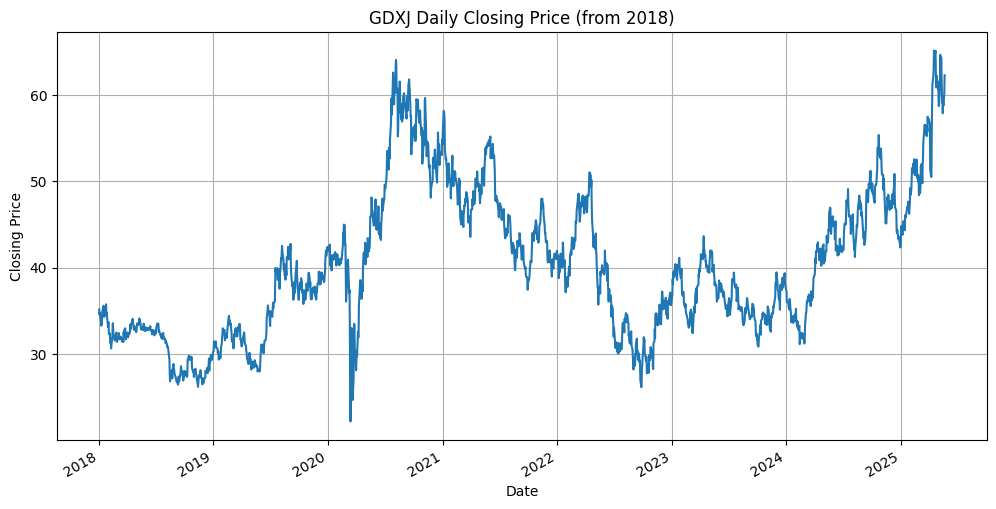

Number of technical indicators successfully added to GDXJ: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for XLE:
              open   high     low  close      volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-20  84.310  84.50  83.510  83.59  11391071.0      NaN     NaN     NaN   
2025-05-19  84.770  84.86  83.745  84.37  12393533.0      NaN     NaN     NaN   
2025-05-16  85.800  85.85  84.605  85.48  10862912.0      NaN     NaN     NaN   
2025-05-15  84.170  85.66  83.960  85.61  14860766.0      NaN     NaN     NaN   
2025-05-14  85.195  85.58  84.920  85.25  10666327.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-20     NaN      NaN  ...       0        

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.04508467e+09 9.26733128e+08 9.09304377e+08 1.24291400e+09
 9.26755444e+08 1.30656913e+09 8.18999796e+08 6.80356519e+08
 8.72135854e+08 1.95280204e+09 4.75968242e+09 4.45773917e+09
 4.06550765e+09 3.32629711e+09 1.59229924e+09 8.91063776e+08
 1.20248638e+09 1.53978586e+09 1.41573277e+09 1.76467069e+09
 2.20259273e+09 2.20037350e+09 1.20190310e+09 1.19692459e+09
 1.19579072e+09 1.43014878e+09 1.30949483e+09 1.73964003e+09
 1.19528723e+09 1.84185844e+09 9.80066490e+08 1.96852112e+09
 1.76170541e+09 1.67996185e+09 1.44636829e+09 1.33737364e+09
 1.35328423e+09 1.65527590e+09 2.30462461e+09 1.11993760e+09
 1.10044753e+09 8.62911416e+08 1.49757994e+09 2.09776530e+09
 1.66696720e+09 1.38279761e+09 1.09917053e+09 9.98533691e+08
 9.77314696e+08 1.04588130e+09 1.05583171e+09 1.07870743

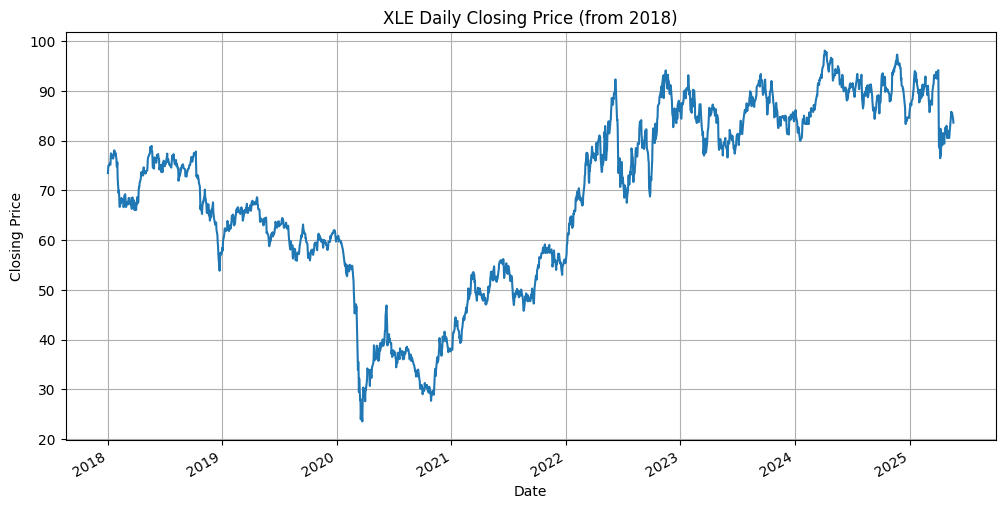

Number of technical indicators successfully added to XLE: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for ICLN:
             open   high      low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                           
2025-05-20  12.94  13.06  12.9400  12.99  1473970.0      NaN     NaN     NaN   
2025-05-19  12.82  12.87  12.7250  12.83  1908367.0      NaN     NaN     NaN   
2025-05-16  13.05  13.05  12.8799  12.96  1719319.0      NaN     NaN     NaN   
2025-05-15  12.89  13.08  12.8500  13.00  2736296.0      NaN     NaN     NaN   
2025-05-14  12.85  12.96  12.8300  12.93  3522216.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-20     NaN      NaN  ...       0        0      

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.22880480e+07 3.55080011e+07 2.39064860e+07 1.78195880e+07
 1.04994021e+07 1.98724428e+07 1.82738893e+07 1.88420242e+07
 5.86193410e+07 3.81074523e+07 4.59686315e+07 3.01587361e+07
 1.34842557e+07 1.87745872e+07 1.79232433e+07 2.59620374e+07
 2.11891623e+07 1.46515243e+07 1.50909273e+07 2.18699157e+07
 2.49446583e+07 1.87938872e+07 2.13793774e+07 2.54102793e+07
 2.62216240e+07 2.70073727e+07 1.97361843e+07 3.01135430e+07
 1.71856540e+07 2.52999143e+07 3.72530024e+07 3.43028802e+07
 4.38258434e+07 2.82533439e+07 3.57518727e+07 2.45272240e+07
 5.65742149e+07 4.12038304e+07 2.22397267e+07 3.52275970e+07
 2.64378813e+07 2.04086142e+07 1.94963636e+07 6.34117205e+07
 4.54074562e+07 4.13424051e+07 3.96056982e+07 5.05988886e+07
 4.05333630e+07 3.61973342e+07 6.16744798e+07 4.73942557

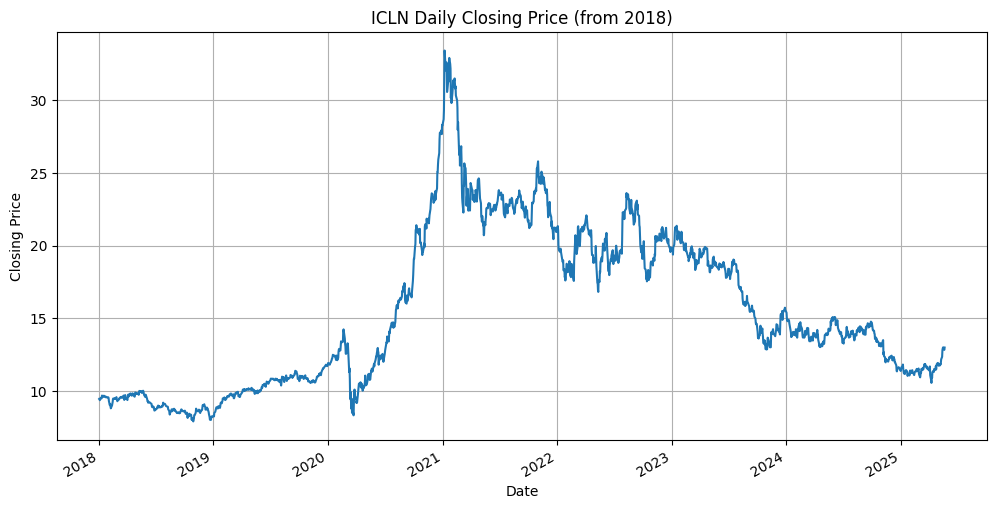

Number of technical indicators successfully added to ICLN: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for SPY:
              open    high       low   close      volume  SMA_100  EMA_20  \
date                                                                        
2025-05-20  593.09  594.05  589.6000  592.85  60614492.0      NaN     NaN   
2025-05-19  588.10  595.54  588.1000  594.85  68168509.0      NaN     NaN   
2025-05-16  591.25  594.50  589.2800  594.20  76052101.0      NaN     NaN   
2025-05-15  585.56  590.97  585.0969  590.46  71268145.0      NaN     NaN   
2025-05-14  587.81  588.98  585.5350  587.59  66283531.0      NaN     NaN   

            WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
date                                 ...                            
2025-05-20     NaN     NaN      NaN  ...       0        0       1   
2025-05-19     Na

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.04123372e+10 3.68438349e+10 2.18019971e+10 3.43562601e+10
 2.64088129e+10 4.21033917e+10 4.40754013e+10 3.06775859e+10
 1.28213059e+11 1.11613405e+11 6.80899725e+10 4.27391774e+10
 4.00593633e+10 2.39341137e+10 2.98072062e+10 2.20617074e+10
 3.56482144e+10 3.77086244e+10 2.77586961e+10 3.88689346e+10
 5.45521205e+10 4.65023784e+10 4.60012486e+10 4.13379127e+10
 4.35845273e+10 5.23986616e+10 2.57904271e+10 3.03870242e+10
 4.61595599e+10 2.22867801e+10 1.89758817e+10 1.81703012e+10
 2.16465587e+10 4.02880143e+10 2.67657445e+10 2.10575324e+10
 4.25225247e+10 2.78350924e+10 3.56955147e+10 2.84274369e+10
 3.34925685e+10 3.32752872e+10 3.86253549e+10 2.48295503e+10
 6.41761611e+10 3.36936351e+10 2.65051970e+10 1.90926282e+10
 1.74111538e+10 2.10381176e+10 1.89938204e+10 1.91578578

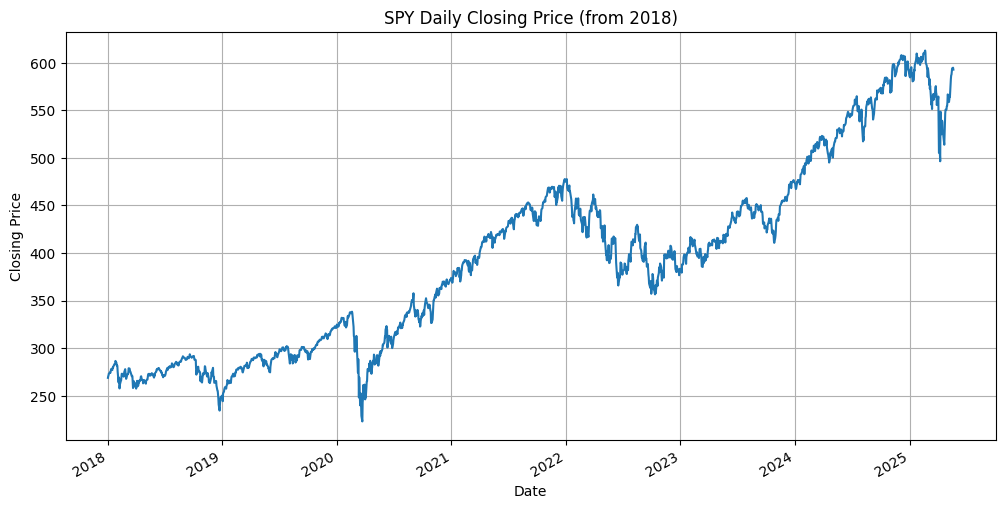

Number of technical indicators successfully added to SPY: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for GLD:
               open      high      low   close      volume  SMA_100  EMA_20  \
date                                                                          
2025-05-20  298.350  303.6825  298.300  303.58  12850980.0      NaN     NaN   
2025-05-19  297.845  298.5800  296.482  298.03  11656261.0      NaN     NaN   
2025-05-16  292.620  294.5750  291.780  294.24  14173039.0      NaN     NaN   
2025-05-15  294.100  297.9000  293.750  297.84  13497735.0      NaN     NaN   
2025-05-14  293.670  294.8000  291.960  293.16  14800596.0      NaN     NaN   

            WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
date                                 ...                            
2025-05-20     NaN     NaN      NaN  ...       0        0       1   
2025

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.00203344e+09 3.05984730e+09 2.12329929e+09 2.46287649e+09
 3.59572232e+09 2.53643683e+09 2.09448324e+09 2.87874236e+09
 3.33040022e+09 1.10320106e+10 6.42367885e+09 6.36730310e+09
 6.28198474e+09 6.03749936e+09 5.86970045e+09 3.19156903e+09
 1.41965092e+09 2.60358120e+09 1.64383142e+09 2.47506443e+09
 2.80381192e+09 1.88236253e+09 2.48754920e+09 1.95184727e+09
 2.71061869e+09 1.45986428e+09 1.99371990e+09 2.25083257e+09
 1.91773467e+09 3.55227614e+09 3.35631388e+09 1.35845446e+09
 1.88018982e+09 1.32584629e+09 2.31595729e+09 3.07357386e+09
 1.18909691e+09 1.52932767e+09 1.14176065e+09 1.13011070e+09
 2.30644340e+09 1.92858497e+09 1.07839406e+09 8.10638850e+08
 2.51165014e+09 2.76282073e+09 1.16853286e+09 1.12814296e+09
 6.62681157e+08 2.60585540e+09 1.87096386e+09 1.95855631

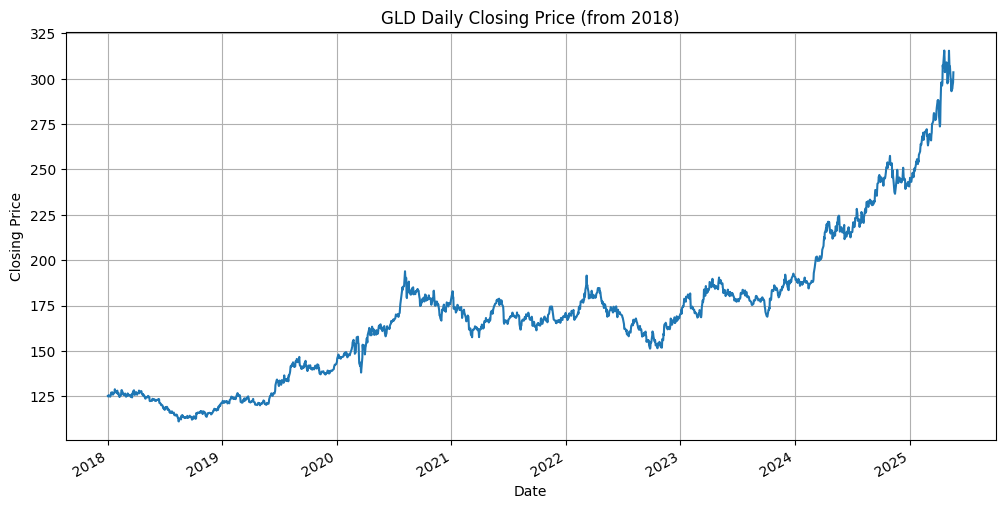

Number of technical indicators successfully added to GLD: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for CPER:
             open     high      low  close    volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-20  28.80  29.2500  28.8000  29.24  225676.0      NaN     NaN     NaN   
2025-05-19  28.86  29.1992  28.8600  29.09  170475.0      NaN     NaN     NaN   
2025-05-16  28.83  28.9100  28.5400  28.61  135681.0      NaN     NaN     NaN   
2025-05-15  28.90  29.3250  28.7994  29.27   95659.0      NaN     NaN     NaN   
2025-05-14  29.26  29.2600  28.9100  29.00  160079.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-20     NaN      NaN  ...       0        

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.78668697e+06 9.28396543e+06 1.14680757e+06 7.15943173e+06
 2.42069891e+06 2.54442787e+06 2.02623015e+06 1.90928380e+06
 6.03545810e+06 1.62406420e+07 1.44168122e+07 1.84183850e+07
 4.27185847e+06 6.84575059e+06 1.07893963e+07 8.75699187e+06
 9.30125148e+06 3.13755990e+06 6.07597367e+06 3.68800910e+06
 1.98760407e+06 1.94124610e+06 2.23358567e+06 1.96787307e+06
 5.90589129e+06 5.37858799e+06 4.72519360e+06 1.26835470e+06
 5.54867008e+06 2.95208942e+06 7.09023933e+06 4.56656916e+06
 1.60096482e+06 8.50485046e+05 9.85055342e+05 1.90859063e+06
 1.93447491e+06 1.25250856e+06 2.10232092e+06 7.91611485e+05
 1.18267858e+06 9.63614195e+05 3.70001406e+06 5.30849929e+05
 1.47739638e+06 5.68505107e+05 1.36011880e+06 1.85720398e+06
 2.56536177e+06 3.09569452e+06 3.01032453e+06 3.18338867

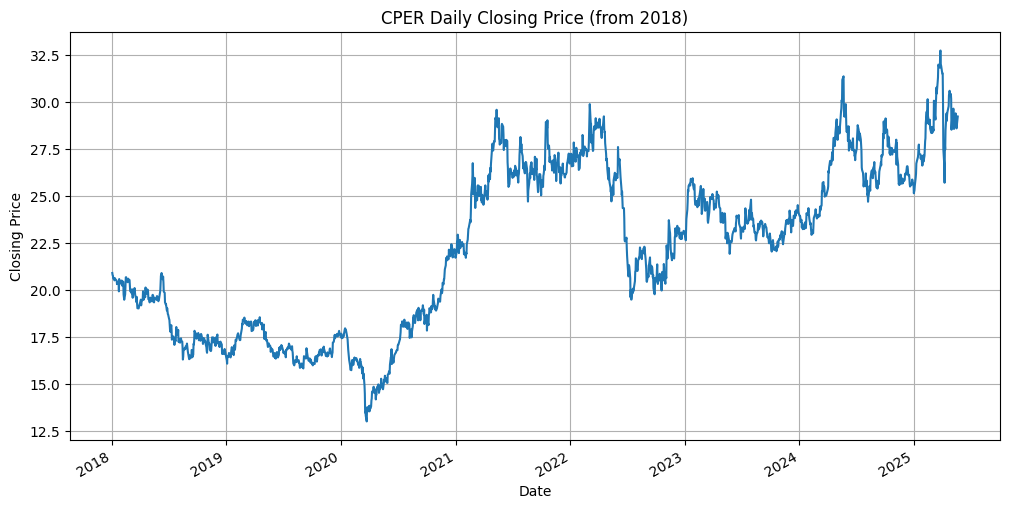

Number of technical indicators successfully added to CPER: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for USO:
             open   high    low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                         
2025-05-20  68.37  68.80  67.78  68.66  2786093.0      NaN     NaN     NaN   
2025-05-19  68.11  69.10  67.88  68.51  5136884.0      NaN     NaN     NaN   
2025-05-16  67.83  68.54  67.42  68.10  3769410.0      NaN     NaN     NaN   
2025-05-15  67.41  67.79  66.87  67.59  5263445.0      NaN     NaN     NaN   
2025-05-14  69.28  69.55  68.70  68.73  2802450.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-20     NaN      NaN  ...       0        0       1          Na

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.51859431e+08 1.93350367e+08 3.27604367e+08 3.72455037e+08
 4.53472376e+08 6.85600074e+08 3.07653536e+08 2.19792429e+08
 2.24962650e+08 6.08892831e+08 3.12468671e+08 3.30678757e+08
 2.09126068e+08 1.00195374e+09 5.24922098e+08 6.27041123e+08
 4.52952069e+08 2.17452786e+08 1.19805965e+08 1.86728050e+08
 1.98732420e+08 2.09118494e+08 1.73453720e+08 3.03725999e+08
 1.47986452e+08 2.95469842e+08 1.76327917e+08 1.98812158e+08
 1.77787950e+08 2.22312315e+08 1.26824416e+08 1.44454872e+08
 3.77214643e+08 1.78641025e+08 1.51488829e+08 4.73379315e+08
 3.26954455e+08 1.74595564e+08 1.25062462e+08 1.53074685e+08
 3.03510990e+08 2.25666010e+08 1.95199703e+08 1.89744540e+08
 2.98826424e+08 4.09619196e+08 4.15670374e+08 3.05574918e+08
 1.46081542e+08 7.45777968e+07 1.16499299e+08 1.53495030

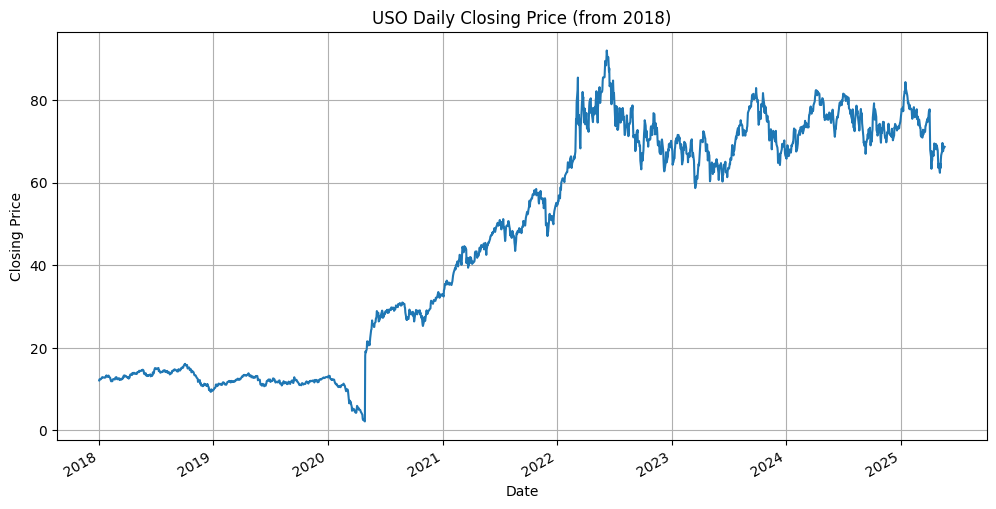

Number of technical indicators successfully added to USO: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for UNG:
             open     high     low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-20  16.32  17.2200  16.295  16.99  7822962.0      NaN     NaN     NaN   
2025-05-19  16.02  16.0900  15.620  15.65  8609611.0      NaN     NaN     NaN   
2025-05-16  17.04  17.2685  16.640  16.71  4364129.0      NaN     NaN     NaN   
2025-05-15  17.39  17.5100  16.780  16.80  6212183.0      NaN     NaN     NaN   
2025-05-14  17.64  17.8400  17.370  17.40  5132737.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-20     NaN      NaN  ...       0        0

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_11584/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.36352213e+07 1.05793476e+08 9.00110979e+07 1.08124041e+08
 8.95486655e+07 1.12573640e+08 9.60155623e+07 1.22898420e+08
 1.10064425e+08 1.31562030e+08 1.29154171e+08 9.93049164e+07
 8.68647636e+07 8.32911610e+07 1.07216583e+08 1.51227965e+08
 1.71212255e+08 2.62338892e+08 1.69012949e+08 1.27814275e+08
 1.05005809e+08 1.48350343e+08 1.19209541e+08 1.14594105e+08
 1.10965645e+08 1.46753446e+08 1.27992128e+08 8.40860602e+07
 1.22561380e+08 1.67751337e+08 2.12855575e+08 1.90482996e+08
 2.96736852e+08 1.42377207e+08 1.16186786e+08 1.16163064e+08
 2.74328617e+08 5.67948139e+08 1.25720337e+08 1.63380626e+08
 1.25242836e+08 9.37428341e+07 1.34289138e+08 1.14117042e+08
 1.85703801e+08 1.71442279e+08 3.21005051e+08 2.73839606e+08
 2.81703833e+08 2.41881552e+08 5.53921475e+08 6.62930432

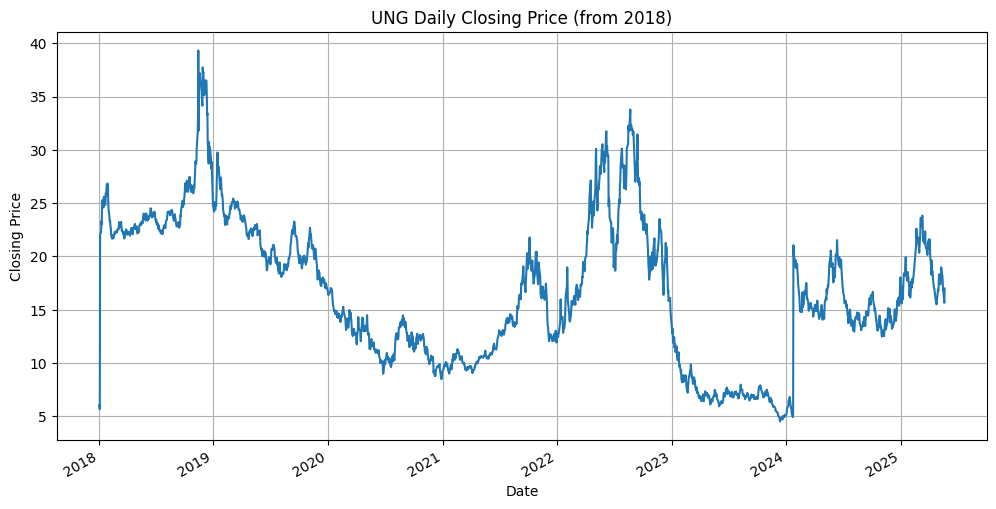

Number of technical indicators successfully added to UNG: 39


In [6]:
# Apply technical indicators to each dataframe
for symbol, data in all_data.items():
    # Skip completely if DataFrame is empty or too small
    if len(data) <= 1:
        print(f"Warning: Ticker {symbol} has insufficient data (length={len(data)}). Skipping technical indicators.")
        continue

    # Rename columns if needed (ensure they match pandas_ta requirements)
    if data.columns[0] != 'open':  # Only rename if not already renamed
        data.columns = ['open', 'high', 'low', 'close', 'volume']

    indicator_count = 0  # Track the number of successfully added indicators

    # Trend Indicators
    try:
        data.ta.sma(length=100, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SMA to {symbol}: {e}")

    try:
        data.ta.ema(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding EMA to {symbol}: {e}")

    try:
        data.ta.wma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding WMA to {symbol}: {e}")

    try:
        data.ta.hma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding HMA to {symbol}: {e}")

    try:
        data.ta.vwma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWMA to {symbol}: {e}")

    try:
        data.ta.macd(fast=12, slow=26, signal=9, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MACD to {symbol}: {e}")

    try:
        data.ta.adx(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ADX to {symbol}: {e}")

    try:
        data.ta.cci(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CCI to {symbol}: {e}")

    try:
        data.ta.rsi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RSI to {symbol}: {e}")

    try:
        data.ta.stoch(k=14, d=3, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Stochastic Oscillator to {symbol}: {e}")

    try:
        data.ta.ichimoku(tenkan=9, kijun=26, senkou=52, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ichimoku Cloud to {symbol}: {e}")

    try:
        data.ta.supertrend(length=7, multiplier=3, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SuperTrend to {symbol}: {e}")

    # Check for PSAR which needs more data
    try:
        if len(data) > 2:
            data.ta.psar(step=0.02, max_step=0.2, append=True)
            indicator_count += 1
        else:
            data['PSARl_0.02_0.2'] = float('nan')
            data['PSARs_0.02_0.2'] = float('nan')
    except Exception as e:
        print(f"Error adding PSAR to {symbol}: {e}")

    # Momentum Indicators
    try:
        data.ta.mom(length=50, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Momentum to {symbol}: {e}")

    try:
        data.ta.roc(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ROC to {symbol}: {e}")

    try:
        data.ta.willr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Williams %R to {symbol}: {e}")

    try:
        data.ta.uo(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ultimate Oscillator to {symbol}: {e}")

    try:
        data.ta.ao(fast=5, slow=34, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Awesome Oscillator to {symbol}: {e}")

    try:
        data.ta.kama(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding KAMA to {symbol}: {e}")

    try:
        data.ta.cg(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Center of Gravity to {symbol}: {e}")

    # Volatility Indicators
    try:
        data.ta.bbands(length=20, std=2, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Bollinger Bands to {symbol}: {e}")

    try:
        data.ta.atr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ATR to {symbol}: {e}")

    try:
        data.ta.kc(length=20, scalar=2, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Keltner Channel to {symbol}: {e}")

    try:
        data.ta.donchian(lower_length=20, upper_length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Donchian Channel to {symbol}: {e}")

    try:
        data.ta.rvi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RVI to {symbol}: {e}")

    # Volume Indicators - OBV needs a length check
    try:
        if len(data) > 1:
            data.ta.obv(append=True)
            indicator_count += 1
        else:
            data['OBV'] = float('nan')
    except Exception as e:
        print(f"Error adding OBV to {symbol}: {e}")

    try:
        data.ta.cmf(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CMF to {symbol}: {e}")

    try:
        data.ta.adosc(fast=3, slow=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding AD Oscillator to {symbol}: {e}")

    try:
        data.ta.mfi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MFI to {symbol}: {e}")

    try:
        data.ta.vwap(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWAP to {symbol}: {e}")

    try:
        data.ta.eom(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ease of Movement to {symbol}: {e}")

    try:
        data.ta.nvi(length=255, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding NVI to {symbol}: {e}")

    # Other Indicators
    try:
        data.ta.squeeze(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding TTM Squeeze to {symbol}: {e}")

    try:
        data.ta.fisher(length=9, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Fisher Transform to {symbol}: {e}")

    try:
        data.ta.decay(length=5, mode="linear", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Linear Decay to {symbol}: {e}")

    try:
        data.ta.decay(length=5, mode="exponential", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Exponential Decay to {symbol}: {e}")

    try:
        data.ta.vortex(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Vortex Indicator to {symbol}: {e}")

    try:
        data.ta.zscore(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Z-Score to {symbol}: {e}")

    try:
        data.ta.entropy(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Entropy to {symbol}: {e}")

    print(f"\nData for {symbol}:")
    print(data.head())  # Print the first few rows of the dataset

    # Plot the data
    data['close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

    # Print the number of technical indicators added
    print(f"Number of technical indicators successfully added to {symbol}: {indicator_count}")

In [8]:
for symbol, data in all_data.items():
    # Get the original column names
    original_columns = data.columns.tolist()
    # Create the new column names with the symbol prefix
    new_columns = [f"{symbol}_{col}" for col in original_columns]
    # Rename the columns in the DataFrame
    data.columns = new_columns
    print(f"\nColumns for {symbol} after renaming:")
    print(data.columns)


Columns for LIT after renaming:
Index(['LIT_LIT_open', 'LIT_LIT_high', 'LIT_LIT_low', 'LIT_LIT_close',
       'LIT_LIT_volume', 'LIT_LIT_SMA_100', 'LIT_LIT_EMA_20', 'LIT_LIT_WMA_20',
       'LIT_LIT_HMA_20', 'LIT_LIT_VWMA_20', 'LIT_LIT_MACD_12_26_9',
       'LIT_LIT_MACDh_12_26_9', 'LIT_LIT_MACDs_12_26_9', 'LIT_LIT_ADX_14',
       'LIT_LIT_DMP_14', 'LIT_LIT_DMN_14', 'LIT_LIT_CCI_20_0.015',
       'LIT_LIT_RSI_14', 'LIT_LIT_STOCHk_14_3_3', 'LIT_LIT_STOCHd_14_3_3',
       'LIT_LIT_ISA_9', 'LIT_LIT_ISB_26', 'LIT_LIT_ITS_9', 'LIT_LIT_IKS_26',
       'LIT_LIT_ICS_26', 'LIT_LIT_SUPERT_7_3.0', 'LIT_LIT_SUPERTd_7_3.0',
       'LIT_LIT_SUPERTl_7_3.0', 'LIT_LIT_SUPERTs_7_3.0',
       'LIT_LIT_PSARl_0.02_0.2', 'LIT_LIT_PSARs_0.02_0.2',
       'LIT_LIT_PSARaf_0.02_0.2', 'LIT_LIT_PSARr_0.02_0.2', 'LIT_LIT_MOM_50',
       'LIT_LIT_ROC_10', 'LIT_LIT_WILLR_14', 'LIT_LIT_UO_7_14_28',
       'LIT_LIT_AO_5_34', 'LIT_LIT_KAMA_10_2_30', 'LIT_LIT_CG_10',
       'LIT_LIT_BBL_20_2.0', 'LIT_LIT_BBM_20_2.0', '

In [9]:

dataframes_to_join = []

for symbol, data in all_data.items():
    dataframes_to_join.append(data)

merged_data = pd.concat(dataframes_to_join, axis=1)

print("\nMerged DataFrame head:")
print(merged_data.head())

print("\nMerged DataFrame info:")
merged_data.info()


Merged DataFrame head:
            LIT_LIT_open  LIT_LIT_high  LIT_LIT_low  LIT_LIT_close  \
date                                                                 
2025-05-20         37.97       38.3600        37.84          38.23   
2025-05-19         37.89       38.2600        37.89          38.20   
2025-05-16         38.48       38.6000        38.30          38.58   
2025-05-15         38.82       38.9662        38.47          38.74   
2025-05-14         39.29       39.5500        39.16          39.24   

            LIT_LIT_volume  LIT_LIT_SMA_100  LIT_LIT_EMA_20  LIT_LIT_WMA_20  \
date                                                                          
2025-05-20        127249.0              NaN             NaN             NaN   
2025-05-19        220562.0              NaN             NaN             NaN   
2025-05-16        143462.0              NaN             NaN             NaN   
2025-05-15        128908.0              NaN             NaN             NaN   
2025-05-14 

In [10]:
merged_data


,LIT_LIT_open,LIT_LIT_high,LIT_LIT_low,LIT_LIT_close,LIT_LIT_volume,LIT_LIT_SMA_100,LIT_LIT_EMA_20,LIT_LIT_WMA_20,LIT_LIT_HMA_20,LIT_LIT_VWMA_20,...,UNG_UNG_SQZ_ON,UNG_UNG_SQZ_OFF,UNG_UNG_SQZ_NO,UNG_UNG_FISHERT_9_1,UNG_UNG_FISHERTs_9_1,UNG_UNG_LDECAY_5,UNG_UNG_VTXP_14,UNG_UNG_VTXM_14,UNG_UNG_ZS_20,UNG_UNG_ENTP_10
date,,,,,,,,,,,,,,,,,,,,,
2025-05-20,37.97,38.3600,37.84,38.23,127249.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.99,NaN,NaN,NaN,NaN
2025-05-19,37.89,38.2600,37.89,38.20,220562.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.79,NaN,NaN,NaN,NaN
2025-05-16,38.48,38.6000,38.30,38.58,143462.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.71,NaN,NaN,NaN,NaN
2025-05-15,38.82,38.9662,38.47,38.74,128908.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.80,NaN,NaN,NaN,NaN
2025-05-14,39.29,39.5500,39.16,39.24,120114.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,17.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-08,40.85,41.1600,40.74,41.08,1145392.0,35.0215,38.855416,39.456619,40.859904,38.239445,...,0,1,0,-2.740692,-2.323336,23.10,0.541557,1.018470,-2.029499,3.244527
2018-01-05,40.24,40.5000,40.17,40.50,671692.0,35.0941,39.012043,39.639286,41.066029,38.659307,...,0,1,0,-3.156574,-2.740692,22.10,0.488189,1.039370,-1.997879,3.234630
2018-01-04,40.01,40.2300,39.76,39.84,697283.0,35.1592,39.090896,39.728952,41.119366,39.024929,...,0,1,0,-3.569366,-3.156574,21.88,0.751617,1.015847,-4.043944,3.044309


In [11]:
data

,UNG_UNG_open,UNG_UNG_high,UNG_UNG_low,UNG_UNG_close,UNG_UNG_volume,UNG_UNG_SMA_100,UNG_UNG_EMA_20,UNG_UNG_WMA_20,UNG_UNG_HMA_20,UNG_UNG_VWMA_20,...,UNG_UNG_SQZ_ON,UNG_UNG_SQZ_OFF,UNG_UNG_SQZ_NO,UNG_UNG_FISHERT_9_1,UNG_UNG_FISHERTs_9_1,UNG_UNG_LDECAY_5,UNG_UNG_VTXP_14,UNG_UNG_VTXM_14,UNG_UNG_ZS_20,UNG_UNG_ENTP_10
date,,,,,,,,,,,,,,,,,,,,,
2025-05-20,16.32,17.2200,16.295,16.99,7822962.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.99,NaN,NaN,NaN,NaN
2025-05-19,16.02,16.0900,15.620,15.65,8609611.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.79,NaN,NaN,NaN,NaN
2025-05-16,17.04,17.2685,16.640,16.71,4364129.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.71,NaN,NaN,NaN,NaN
2025-05-15,17.39,17.5100,16.780,16.80,6212183.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.80,NaN,NaN,NaN,NaN
2025-05-14,17.64,17.8400,17.370,17.40,5132737.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,17.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-08,22.36,22.5200,22.010,22.30,9144619.0,23.0604,24.236170,24.647000,23.725454,24.888837,...,0,1,0,-2.740692,-2.323336,23.10,0.541557,1.018470,-2.029499,3.244527
2018-01-05,21.99,22.2000,21.890,22.08,9380600.0,23.0423,24.030820,24.376286,23.167711,24.789592,...,0,1,0,-3.156574,-2.740692,22.10,0.488189,1.039370,-1.997879,3.234630
2018-01-04,5.94,6.0000,5.610,5.67,20350366.0,22.8653,22.282171,22.548238,20.891248,22.566865,...,0,1,0,-3.569366,-3.156574,21.88,0.751617,1.015847,-4.043944,3.044309


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import iqr

class FeatureScaler(BaseEstimator, TransformerMixin):
    """
    Automatically detects and applies optimal scaling for financial time series features.
    Handles mixed-scale features like RSI (0-100) and ATR (volatility) without hardcoding.
    """
    
    def __init__(self):
        self.scalers = {}
        self.feature_stats = {}

    def _auto_detect_scaler(self, data):
        """Heuristic-based scaler selection using financial data characteristics"""
        # Calculate distribution properties
        q1, q3 = np.percentile(data, [25, 75])
        iqr_val = q3 - q1
        range_val = np.max(data) - np.min(data)
        has_outliers = (iqr_val > 0) and (range_val / iqr_val > 4)
        
        # Check for common financial indicator ranges
        is_bounded = (
            (np.min(data) >= 0) and 
            (np.max(data) <= 100) and 
            (range_val >= 50)  # Typical for RSI-like features
        )
        
        if is_bounded:
            return MinMaxScaler(feature_range=(0, 1)), 'minmax'
        elif has_outliers:
            return RobustScaler(), 'robust'
        else:
            return StandardScaler(), 'standard'

    def fit(self, X, y=None):
        for col in X.columns:
            column_data = X[col].values.reshape(-1, 1)
            scaler, scaler_type = self._auto_detect_scaler(column_data)
            self.scalers[col] = scaler.fit(column_data)
            
            # Store metadata for MLOps monitoring
            self.feature_stats[col] = {
                'min': np.min(column_data),
                'max': np.max(column_data),
                'iqr': iqr(column_data),
                'scaler': scaler_type
            }
        return self

    def transform(self, X):
        X_scaled = X.copy()
        for col, scaler in self.scalers.items():
            X_scaled[col] = scaler.transform(X_scaled[col].values.reshape(-1, 1)).flatten()
        return X_scaled

    def get_feature_stats(self):
        """For MLOps monitoring and model interpretation"""
        return pd.DataFrame(self.feature_stats).T

# Usage example with your existing pipeline
# First handle missing values
merged_data_filled = fill_nan_with_rolling_median(merged_data.copy(), window_size=21)

# Split data with time-series awareness
train_size = int(len(merged_data_filled) * 0.8)
train_data = merged_data_filled.iloc[:train_size]
test_data = merged_data_filled.iloc[train_size:]

# Initialize and fit scaler
scaler = FeatureScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# For MLOps integration
feature_stats_df = scaler.get_feature_stats()
print("\nFeature scaling statistics:")
print(feature_stats_df)

# Optional: Visualize scaling decisions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for idx, col in enumerate(train_data.columns, 1):
    plt.subplot(2, 3, idx)
    plt.hist(train_scaled[col], bins=50)
    plt.title(f"{col}\n({feature_stats_df.loc[col, 'scaler']})")
plt.tight_layout()
plt.show()

In [12]:
#def fill_nan_with_rolling_median(df, window_size=21): # Use an odd window size to center
#    if window_size % 2 == 0:
#        window_size += 1 # Ensure window size is odd for centering
#    if window_size < 3:
#        window_size = 3 # Minimum window size

#    # Apply rolling median and then fill remaining NaNs with overall median
#    df_filled = df.apply(lambda col: col.fillna(col.rolling(window=window_size, center=True).median()))
#    df_filled = df_filled.fillna(df_filled.median())

#    return df_filled

# Apply rolling median imputation to the merged_data DataFrame
#merged_data_filled = fill_nan_with_rolling_median(merged_data.copy(), window_size=21)

#print("\nNaN counts in merged_data_filled after rolling median imputation:")
#print(merged_data_filled.isnull().sum())


NaN counts in merged_data_filled after rolling median imputation:
LIT_LIT_open        0
LIT_LIT_high        0
LIT_LIT_low         0
LIT_LIT_close       0
LIT_LIT_volume      0
                   ..
UNG_UNG_LDECAY_5    0
UNG_UNG_VTXP_14     0
UNG_UNG_VTXM_14     0
UNG_UNG_ZS_20       0
UNG_UNG_ENTP_10     0
Length: 852, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
import os
import pandas as pd

target_column = 'LIT_close' # < remove hardcording to make any symbol feasible at target stock price ?

columns_to_drop = ['LIT_high', 'LIT_low', 'LIT_open']

if target_column in merged_data_filled.columns:
    merged_data_filled['LIT_target'] = merged_data_filled[target_column].shift(-1)

    merged_data_filled.dropna(subset=['LIT_target'], inplace=True)

    X = merged_data_filled.drop(columns=['LIT_target', target_column] + columns_to_drop, errors='ignore') # Add columns to drop
    y = merged_data_filled['LIT_target']

    train_size = int(len(merged_data_filled) * 0.6)

    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]

    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    output_dir = 'data_split'

    if os.path.exists(output_dir):
      import shutil
      shutil.rmtree(output_dir)
    os.makedirs(output_dir)

    X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=True) # Include index for timestamp
    X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=True)   # Include index for timestamp
    y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=True, header=True) # Include index and header
    y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=True, header=True)     # Include index and header

    print(f"Training and testing data saved to CSV files in the '{output_dir}' directory.")
    print(f"- {os.path.join(output_dir, 'X_train.csv')}")
    print(f"- {os.path.join(output_dir, 'X_test.csv')}")
    print(f"- {os.path.join(output_dir, 'y_train.csv')}")
    print(f"- {os.path.join(output_dir, 'y_test.csv')}")

else:
    print(f"Target column '{target_column}' not found in the DataFrame.")
    print("Please ensure the target column name is correct.")

Target column 'LIT_close' not found in the DataFrame.
Please ensure the target column name is correct.


In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import xgboost as xgb

In [15]:
def purged_kfold_split(data, n_splits=5, purging_window=timedelta(days=5)):

        kf = KFold(n_splits=n_splits)
        indices = np.arange(len(data))
        dates = data.index

        for train_index, test_index in kf.split(indices):
            test_start_date = dates[test_index[0]]
            test_end_date = dates[test_index[-1]]

            purge_start_date = test_start_date - purging_window
            purge_end_date = test_end_date + purging_window

            train_mask = (dates[train_index] < purge_start_date) | (dates[train_index] > purge_end_date)

            purged_train_index = train_index[train_mask]

            yield purged_train_index, test_index

change the model training to XGB, LSTM (with layers added and remove in optimizing?, SVM, ARIMA GARCH+ML, CNN+LSTM? )

In [16]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from datetime import timedelta
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Define a function to create an objective function for each model type
def create_objective(model_type):
    def objective(trial):
        X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
        y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze() # Use squeeze to get a Series
        
        # Define parameters based on model type
        if model_type == 'xgboost':
            params = {
                'objective': 'reg:squarederror',
                'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                'max_depth': trial.suggest_int('max_depth', 5, 15),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
                'gamma': trial.suggest_float('gamma', 0, 0.5),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
                'random_state': 42
            }
            model_class = xgb.XGBRegressor
            
        elif model_type == 'random_forest':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
                'max_depth': trial.suggest_int('max_depth', 5, 30),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_float('max_features', 0.3, 1.0),
                'random_state': 42
            }
            model_class = RandomForestRegressor
            
        elif model_type == 'extra_trees':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
                'max_depth': trial.suggest_int('max_depth', 5, 30),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_float('max_features', 0.3, 1.0),
                'random_state': 42
            }
            model_class = ExtraTreesRegressor
            
        elif model_type == 'hist_gradient_boosting':
            params = {
                'max_iter': trial.suggest_int('max_iter', 100, 1000),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                'max_depth': trial.suggest_int('max_depth', 5, 15),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'l2_regularization': trial.suggest_float('l2_regularization', 0, 10),
                'random_state': 42
            }
            model_class = HistGradientBoostingRegressor
            
        n_splits = 3
        purging_window = timedelta(days=5) # Adjust as needed
        fold_errors = []

        # Perform purged k-fold cross-validation
        for train_indices, test_indices in purged_kfold_split(X, n_splits=n_splits, purging_window=purging_window):
            X_train_fold, X_test_fold = X.iloc[train_indices], X.iloc[test_indices]
            y_train_fold, y_test_fold = y.iloc[train_indices], y.iloc[test_indices]

            model = model_class(**params)
            model.fit(X_train_fold, y_train_fold)

            y_pred_fold = model.predict(X_test_fold)
            mse = mean_squared_error(y_test_fold, y_pred_fold)
            fold_errors.append(mse)

        return np.mean(fold_errors)
    
    return objective

# Dictionary to store the best trials for each model
best_models = {}

# List of models to evaluate
models = ['xgboost', 'random_forest', 'extra_trees', 'hist_gradient_boosting']

# Run optimization for each model
for model_type in models:
    print(f"\n\nOptimizing {model_type.upper()}...")
    study = optuna.create_study(direction='minimize', study_name=model_type)
    study.optimize(create_objective(model_type), n_trials=150)
    
    print(f"Best {model_type} trial:")
    print(f"  Value: {study.best_trial.value}")
    print("  Params: ")
    for key, value in study.best_trial.params.items():
        print(f"    {key}: {value}")
    
    # Store the best trial
    best_models[model_type] = {
        'value': study.best_trial.value,
        'params': study.best_trial.params
    }

# Compare all models
print("\n\n=== MODEL COMPARISON ===")
for model_type, results in sorted(best_models.items(), key=lambda x: x[1]['value']):
    print(f"{model_type.upper()}: MSE = {results['value']:.6f}")

# Identify the best overall model
best_model = min(best_models.items(), key=lambda x: x[1]['value'])
print(f"\nBest overall model: {best_model[0].upper()} with MSE = {best_model[1]['value']:.6f}")

[I 2025-05-21 13:25:45,083] A new study created in memory with name: xgboost




Optimizing XGBOOST...


[I 2025-05-21 13:25:49,000] Trial 0 finished with value: 18.02654862489874 and parameters: {'n_estimators': 886, 'learning_rate': 0.15622210592384841, 'max_depth': 11, 'subsample': 0.8069141314819304, 'colsample_bytree': 0.5469025875529141, 'gamma': 0.2171809310720465, 'min_child_weight': 1}. Best is trial 0 with value: 18.02654862489874.
[I 2025-05-21 13:25:50,430] Trial 1 finished with value: 15.948995967877025 and parameters: {'n_estimators': 179, 'learning_rate': 0.13103570827997685, 'max_depth': 14, 'subsample': 0.8698064263294624, 'colsample_bytree': 0.326705651272751, 'gamma': 0.35714647453524145, 'min_child_weight': 2}. Best is trial 1 with value: 15.948995967877025.
[I 2025-05-21 13:25:52,460] Trial 2 finished with value: 16.376848092171354 and parameters: {'n_estimators': 270, 'learning_rate': 0.06858054987362454, 'max_depth': 7, 'subsample': 0.781525249700024, 'colsample_bytree': 0.31337649848644766, 'gamma': 0.19896832980391266, 'min_child_weight': 4}. Best is trial 1 with 

Best xgboost trial:
  Value: 8.327514560828426
  Params: 
    n_estimators: 408
    learning_rate: 0.12289891796299292
    max_depth: 12
    subsample: 0.5085056698938987
    colsample_bytree: 0.3678144145807429
    gamma: 0.32697446945436687
    min_child_weight: 2


Optimizing RANDOM_FOREST...


[I 2025-05-21 13:36:16,606] Trial 0 finished with value: 14.34411335153088 and parameters: {'n_estimators': 843, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 0.8016674735778803}. Best is trial 0 with value: 14.34411335153088.
[I 2025-05-21 13:37:07,458] Trial 1 finished with value: 13.982298762509132 and parameters: {'n_estimators': 662, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.4802498167767829}. Best is trial 1 with value: 13.982298762509132.
[I 2025-05-21 13:37:33,894] Trial 2 finished with value: 14.118208669892423 and parameters: {'n_estimators': 383, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.4712401826880155}. Best is trial 1 with value: 13.982298762509132.
[I 2025-05-21 13:38:06,762] Trial 3 finished with value: 14.628336541126318 and parameters: {'n_estimators': 285, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.8260430012397295}.

In [ ]:
# Function to perform final prediction using the best model

def final_prediction(best_model, X_test_path, y_test_path):
    # Load test data
    X_test = pd.read_csv(X_test_path, index_col=0, parse_dates=True)
    y_test = pd.read_csv(y_test_path, index_col=0, parse_dates=True).squeeze()
    
    # Extract the best model type and parameters
    model_type, best_trial = best_model
    model_class = None
    
    # Determine the model class based on the model type
    if model_type == 'xgboost':
        model_class = xgb.XGBRegressor
    elif model_type == 'random_forest':
        model_class = RandomForestRegressor
    elif model_type == 'extra_trees':
        model_class = ExtraTreesRegressor
    elif model_type == 'hist_gradient_boosting':
        model_class = HistGradientBoostingRegressor
    
    # Initialize the model with the best parameters
    model = model_class(**best_trial['params'])
    
    # Fit the model on the entire training data
    X_train = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
    y_train = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate and print the mean squared error on the test data
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nFinal prediction using {model_type.upper()}:")
    print(f"MSE on test data: {mse:.6f}")
    
    return y_pred

# Example usage:
# final_prediction(best_model, 'data_split/X_test.csv', 'data_split/y_test.csv')